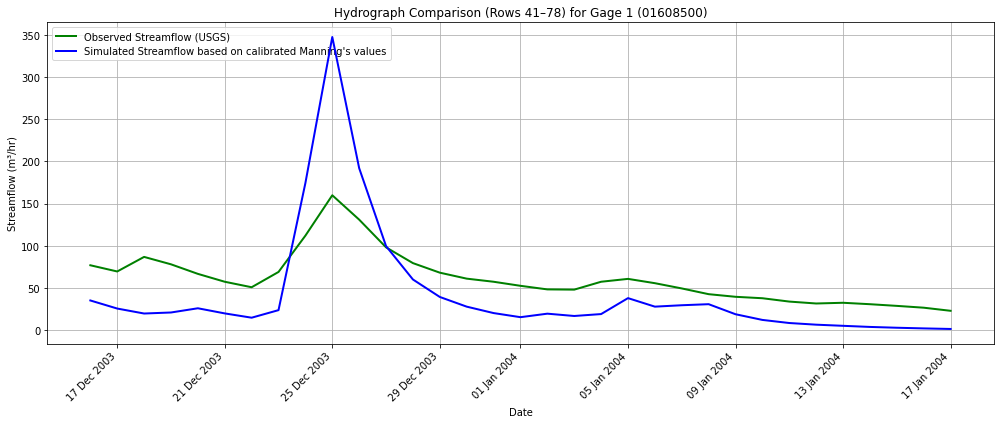

In [25]:
# ----------------------------------------------------
# Import Libraries 
# ----------------------------------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ----------------------------------------------------
# Set Base Directory and Station ID
# ----------------------------------------------------
station_id = "01608500"

# ----------------------------------------------------
# Load Observed and Baseline Data
# ----------------------------------------------------
df_obs = pd.read_csv("/home/ms6730/streamflow_one_water_year/sbi_framework/outputs/sinnemahoning/streamflow_daily_df.csv")
df_twenty_sim_sum_statistics = pd.read_csv("/home/ms6730/SBI_calibration/hydrograph_one_water_year_baseline_observed/calibrated_streamflow.csv")

# ----------------------------------------------------
# Convert and Align Date Columns and Drop First 5 Days
# ----------------------------------------------------
dates_obs = pd.to_datetime(df_obs["date"])[5:]
df_obs = df_obs.iloc[5:].reset_index(drop=True)

df_twenty_sim_sum_statistics["date"] = pd.to_datetime(df_twenty_sim_sum_statistics["date"])
df_twenty_sim_sum_statistics.set_index("date", inplace=True)
df_twenty_sim_sum_statistics = df_twenty_sim_sum_statistics.iloc[5:]
dates_twenty_sim_stat = df_twenty_sim_sum_statistics.index

# ----------------------------------------------------
# Plot Data (Only Rows 41 to 78)
# ----------------------------------------------------
plt.figure(figsize=(14, 6))

# Plot observed streamflow (rows 41–78 => iloc[40:78])
plt.plot(dates_obs[45:78], df_obs[station_id].iloc[45:78], color='green', linewidth=2,
         label='Observed Streamflow (USGS)', zorder=10)

# for i in range (45,79):
#     print(dates_twenty_sim_stat[i])

# Plot best-matching simulated streamflow (rows 41–78 => iloc[40:78])
plt.plot(dates_twenty_sim_stat[45:78], 
         df_twenty_sim_sum_statistics[station_id].iloc[45:78], 
         color='blue', linewidth=2,
         label='Simulated Streamflow based on calibrated Manning\'s values', 
         zorder=10)


# Titles and labels
plt.title(f"Hydrograph Comparison (Rows 41–78) for Gage 1 ({station_id})")
plt.xlabel("Date")
plt.ylabel("Streamflow (m³/hr)")
plt.legend(loc="upper left")
plt.grid(True)

# Format x-axis
locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# ----------------------------------------------------
# Save the Figure
# ----------------------------------------------------
output_path = "/home/ms6730/SBI_calibration/calibrating_first_period/hydrograph_observed_calibrated_streamflow.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# ----------------------------------------------------
# Show Plot
# ----------------------------------------------------
plt.show()
